##Ejercicios del bootcamp
###Implementación de validación cruzada

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [5]:
#Generación de datos ficticios
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, random_state=42)


In [6]:
#Inicializacón del modelo
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [7]:
#Validación cruzada con 5 folds
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy:\n", scores.mean())


Accuracy:
 0.883


##Curvas de aprendizaje

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification


In [15]:
#Generación de datos ficticios
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, random_state=42)


In [16]:
#Inicialización del modelo
clf = DecisionTreeClassifier()

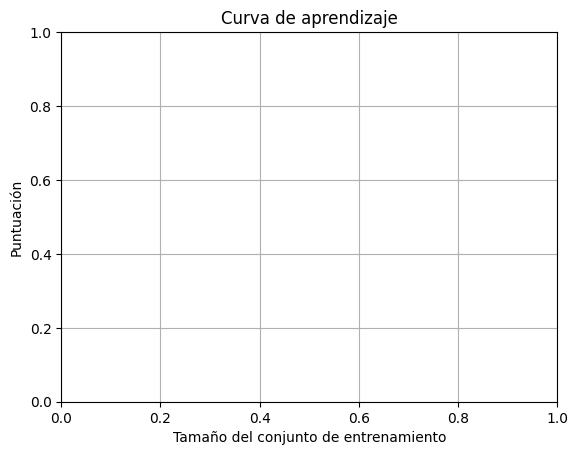

In [17]:
#Calculos de la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure()
plt.title("Curva de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

In [18]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [19]:
train_scores_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
train_scores_std

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
test_scores_mean

array([0.729, 0.818, 0.836, 0.85 , 0.839, 0.859, 0.866, 0.878, 0.884,
       0.874])

In [22]:
test_scores_std

array([0.02416609, 0.01469694, 0.02083267, 0.01923538, 0.02634388,
       0.02727636, 0.02177154, 0.02315167, 0.0156205 , 0.01854724])

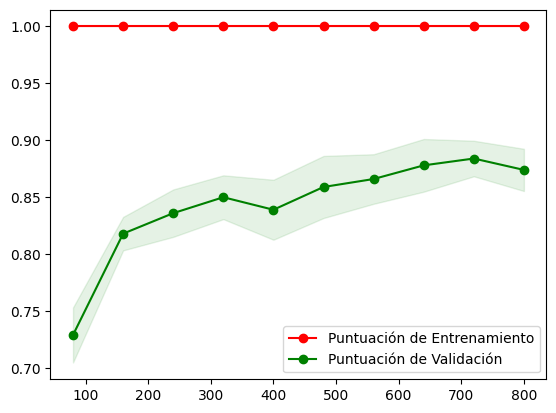

In [23]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Validación")
plt.legend(loc="best")
plt.show()


###División  de los datos en conjuntos de entrenamiento y prueba

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Inicialización del modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
#Predicciones sobre el conjunto de pruebas
y_pred = clf.predict(X_test)

In [33]:
#Calculo de métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [34]:
print("Precisión:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precisión: 0.9101123595505618
Recall: 0.8709677419354839
F1 Score: 0.8901098901098902


##Ejercicio:
####Cálculo de la matriz de confución

In [41]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target


In [43]:
#dividir el conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
#Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
#Realizar predicciones
y_pred = model.predict(X_test)

In [54]:
#Calcular métricas de evaluación
confusion_matrixx = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: \n", confusion_matrixx)

Matriz de confusión: 
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


Axes(0.125,0.11;0.775x0.77)


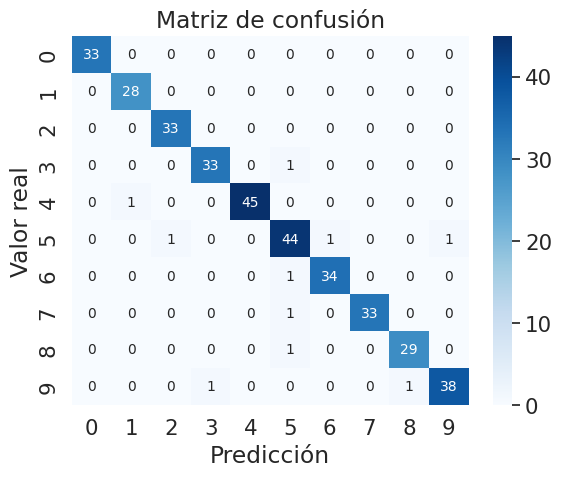

In [60]:
#Graficación de la matrix de confusión
ax = plt.axes()
df_cm = confusion_matrixx
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Matriz de confusión')
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
ax.xaxis.set_ticklabels(digits.target_names)
ax.yaxis.set_ticklabels(digits.target_names)
plt.show()